# Exploratory Data Analysis of Price Per Sqft 

Here we explore the price per sqft metric and what factors may affect it. 

Overview: This dataset contains real estate listings from Utah in year 2024. The dataset is comprised of 4400 entries and 14 columns. Attributes contained within the dataset include type, description, year built, number of bedrooms and bathrooms, garages, lot size, square footage, stories, listing price, status, and when the property was last sold. This data was ethically mined from Realtor.com using an API provided by Apify.

Source: The dataset is from kaggle. Here's the link https://www.kaggle.com/datasets/kanchana1990/real-estate-data-utah-2024

# Import initial libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Re-format scientific notation for simpler reading

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)

# Load data. Print columns, shape, and first 5 rows of dataset

In [3]:
data = pd.read_csv("real_estate_utah.csv") #load data
print(data.columns) #print columns

Index(['type', 'text', 'year_built', 'beds', 'baths', 'baths_full',
       'baths_half', 'garage', 'lot_sqft', 'sqft', 'stories', 'lastSoldOn',
       'listPrice', 'status'],
      dtype='object')


In [4]:
print(data.shape) #print shape of data set

(4440, 14)


In [5]:
print(data.head(n=5)) #print first 5 rows

            type                                               text  \
0  single_family  Escape to tranquility with this off-grid, unfi...   
1  single_family  Beautiful home in the desirable Oak Hills and ...   
2  single_family  Welcome to your new home, nestled in the heart...   
3  single_family  Investment Opportunity. House needs some work ...   
4           land  Deer Springs Ranch is an 8000 Ac Ranch in an H...   

   year_built  beds  baths  baths_full  baths_half  garage  lot_sqft    sqft  \
0     2020.00  1.00   1.00        1.00        1.00    2.00  71438.00  696.00   
1     1968.00  4.00   3.00        2.00        1.00    2.00  56628.00 3700.00   
2     1985.00  4.00   3.00        3.00        1.00    1.00  10019.00 3528.00   
3     1936.00  4.00   2.00        2.00        1.00    2.00  12632.00 2097.00   
4     2003.00  4.00   0.00        2.00        1.00    2.00 872071.00 2400.00   

   stories  lastSoldOn  listPrice    status  
0     2.00  2018-05-31   90000.00  for_sale  


# Descriptive Analysis

## Print Data types within dataset

In [6]:
print(data.dtypes) #print data types

type           object
text           object
year_built    float64
beds          float64
baths         float64
baths_full    float64
baths_half    float64
garage        float64
lot_sqft      float64
sqft          float64
stories       float64
lastSoldOn     object
listPrice     float64
status         object
dtype: object


## Check for NA/NULL values

In [7]:
print(data.isna().sum()) #print nmumber null values found in each column

type          0
text          0
year_built    0
beds          0
baths         0
baths_full    0
baths_half    0
garage        0
lot_sqft      0
sqft          0
stories       0
lastSoldOn    0
listPrice     0
status        0
dtype: int64


## Print Descriptive statistics of the data set

In [8]:
print(data.describe().T)

             count      mean         std     min       25%       50%  \
year_built 4440.00   1997.94       23.61 1860.00   1997.00   2003.00   
beds       4440.00      3.89        1.27    1.00      3.00      4.00   
baths      4440.00      2.45        1.79    0.00      2.00      3.00   
baths_full 4440.00      2.24        1.17    1.00      2.00      2.00   
baths_half 4440.00      1.02        0.19    1.00      1.00      1.00   
garage     4440.00      2.33        1.02    0.00      2.00      2.00   
lot_sqft   4440.00 552523.95 11344714.29  436.00   9583.00  13939.00   
sqft       4440.00   2712.32     1553.68    0.00   1842.00   2400.00   
stories    4440.00      2.00        0.63    1.00      2.00      2.00   
listPrice  4440.00 796604.38  1731703.12    0.00 353805.00 528995.00   

                 75%          max  
year_built   2007.00      2026.00  
beds            4.00        19.00  
baths           3.00        45.00  
baths_full      3.00        45.00  
baths_half      1.00       

# Data Preprocessing

## Remove unneeded columns

In [9]:
data.drop(columns=['text'], axis=1, inplace=True) #text not needed for this analysis
print(data.columns) #confirm changes

Index(['type', 'year_built', 'beds', 'baths', 'baths_full', 'baths_half',
       'garage', 'lot_sqft', 'sqft', 'stories', 'lastSoldOn', 'listPrice',
       'status'],
      dtype='object')


Removed 'text' column as it is not needed for this analysis

## Change data types of columns

In [10]:
#change 'lastSoldOn' column to date data type
data['lastSoldOn'] = pd.to_datetime(data['lastSoldOn'])

#change year_built to int
data['year_built'] = data['year_built'].astype('int')

print(data.dtypes) #confirm changes

type                  object
year_built             int64
beds                 float64
baths                float64
baths_full           float64
baths_half           float64
garage               float64
lot_sqft             float64
sqft                 float64
stories              float64
lastSoldOn    datetime64[ns]
listPrice            float64
status                object
dtype: object


Changed 'lastSoldOn' to date data type.

Changed 'year_built' to int data type

## Feature Engineering

### Create 'age' column and remove 'year_built' column
As this analysis is not an analysis of time series data the year feature in this data set turns into a descrete variable which doesn't render much use with statistical tests and modeling without context of what the year means. 'age' will be calculated as current_year - 'year_built' which gives context to each samples 'year_built' feature w.r.t. the entire dataset and is a continuous variable that can bring more insight into the data set.

In [11]:
data['age'] = pd.to_datetime('today').year - data['year_built'] #calculate age
data.drop(columns=['year_built'], axis=1, inplace=True) #drop 'year_built' column

### Create 'lastSoldNumYears' column and remove 'lastSoldOn' column 
'lastSoldNumYears' will be created by (currentDate - lastSoldOn)/365 making the column in units of years. This new feature is a continous feature that can bring more insight into the data set and will be more use in statistical tests and modeling.

In [12]:
#calculate lastSoldNumYears
data['lastSoldNumYears'] =  [(pd.to_datetime('today').date() - x.date()).days/365 for x in data['lastSoldOn']]
data.drop(columns=['lastSoldOn'], axis=1, inplace=True)

In [13]:
#confirm changes
print(data.columns)

Index(['type', 'beds', 'baths', 'baths_full', 'baths_half', 'garage',
       'lot_sqft', 'sqft', 'stories', 'listPrice', 'status', 'age',
       'lastSoldNumYears'],
      dtype='object')


### Create 'pricePerSqft' feature
Price per square foot is an industry standard calculation to compare different properties. This will be used in the analysis portion of this notebook. Data samples with a 0.0 sqft will evaluate to infinity, these will be manually filtered in analyses along with samples with a 0.0 listPrice

In [14]:
data['pricePerSqft'] = data['listPrice'] / data['sqft'] #create feature
print(data.columns) #confirm changes

Index(['type', 'beds', 'baths', 'baths_full', 'baths_half', 'garage',
       'lot_sqft', 'sqft', 'stories', 'listPrice', 'status', 'age',
       'lastSoldNumYears', 'pricePerSqft'],
      dtype='object')


### Combine baths_full, baths_half, and baths into single feature named totalBaths. Delete the original bath columns
These features appear to be parts of a whole. Combining them will simplify calculation and won't detract from the data set. 

In [15]:
data['totalBaths'] = data['baths'] + data['baths_full'] + (data['baths_half']*0.5) #combine features
data.drop(columns=['baths','baths_full','baths_half'], axis=1, inplace=True) #drop columns

print(data.columns) #confirm changes'
print(data.head(n=1)) #print example

Index(['type', 'beds', 'garage', 'lot_sqft', 'sqft', 'stories', 'listPrice',
       'status', 'age', 'lastSoldNumYears', 'pricePerSqft', 'totalBaths'],
      dtype='object')
            type  beds  garage  lot_sqft   sqft  stories  listPrice    status  \
0  single_family  1.00    2.00  71438.00 696.00     2.00   90000.00  for_sale   

   age  lastSoldNumYears  pricePerSqft  totalBaths  
0    4              6.44        129.31        2.50  


### Find unique values within categorical features and combine like values if necessary

#### 'type' column analysis

In [16]:
#type column analysis
print("Original Values:\n",data.type.value_counts())

#combine like values
townhome_values = ['townhomes', 'townhouse']
condo_values = ['condos', 'condo', 'condo_townhome_rowhome_coop', 'condo_townhome']
data.loc[data['type'].isin(townhome_values), "type"] = "townhome"
data.loc[data['type'].isin(condo_values), 'type'] = "condo"

print("\nConfirm Changes:\n",data.type.value_counts()) #confirm changes

Original Values:
 single_family                  2883
land                            801
townhomes                       344
mobile                          206
condos                          156
townhouse                        14
other                            12
farm                              9
condo_townhome_rowhome_coop       8
condo_townhome                    6
condo                             1
Name: type, dtype: int64

Confirm Changes:
 single_family    2883
land              801
townhome          358
mobile            206
condo             171
other              12
farm                9
Name: type, dtype: int64


#### 'status' column analysis

In [17]:
print(data.status.value_counts())

for_sale          4185
ready_to_build     255
Name: status, dtype: int64


# Exploratory Data Analysis

## Function to calculate outliers using the IQR method and returns the outlier samples

In [18]:
def Find_Outliers(df, column, houseType):
    #df : input dataframe
    #column: clolumn within df to be checked using IQR method
    #housetype: filter data based on house type
    #return: a list containing 2 dataframes encompassing outlier samples based on house type (if specified): 
            #1: samples below lower bound 
            #2: samples above per bound
            #3: df with outliers removed
            
    lowOutliers_df = pd.DataFrame()
    hgihOutliers_df = pd.DataFrame()
    no_outliers_df = pd.DataFrame()
    df_list = []
    
    if(houseType != "NULL"):
        df = df.loc[df['type'] == houseType].copy()
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
        
    lowOutliers_df = df[(df[column] < lower_bound)].copy()
    highOutliers_df = df[(df[column] > upper_bound)].copy()
    no_outliers_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    df_list = [lowOutliers_df, highOutliers_df, no_outliers_df]
    return df_list

## Create dataframe of samples with sqft > 0.0 for analysis of pricePerSqft

In [19]:
data_ppsqft = data.loc[(data["sqft"] > 0.0) & (data['listPrice'] > 0.0)].copy()
print(data_ppsqft.shape)

(4421, 12)


## Create list of unique house types within data set

In [20]:
type_list = data['type'].unique().tolist()
print(type_list)

['single_family', 'land', 'mobile', 'condo', 'townhome', 'other', 'farm']


## View Descriptive stats of pricePerSqft

In [21]:
desc = data_ppsqft['pricePerSqft'].describe()
desc = pd.DataFrame(desc).T
print(desc)

               count   mean    std  min    25%    50%    75%     max
pricePerSqft 4421.00 272.36 380.22 0.62 167.23 224.68 294.12 8312.50


## Boxplot of Price Per Sqft

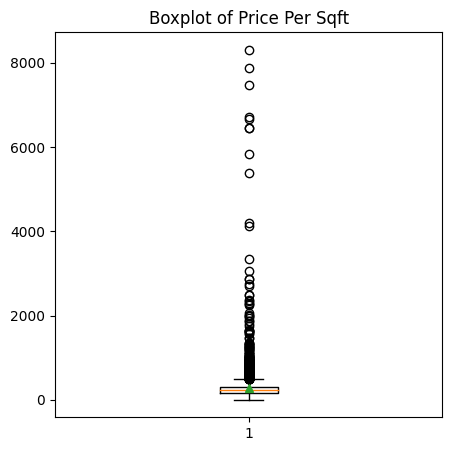

In [22]:
plt.figure(figsize=(5,5))
plt.boxplot(data_ppsqft["pricePerSqft"], showmeans=True)
plt.title("Boxplot of Price Per Sqft")
plt.show()

## Distribution of pricePerSqft

In [23]:
ppsqft_skewness = data_ppsqft.pricePerSqft.skew()
print("Price Per Sqft skewness: ",ppsqft_skewness)
if(ppsqft_skewness > 0):
    print("Data is skewed to the right")
elif(ppsqft_skewness == 0):
    print("Data is not skewed")
else:
    print("Data is skewed to the left")

Price Per Sqft skewness:  12.471674400066984
Data is skewed to the right


<Figure size 500x1500 with 0 Axes>

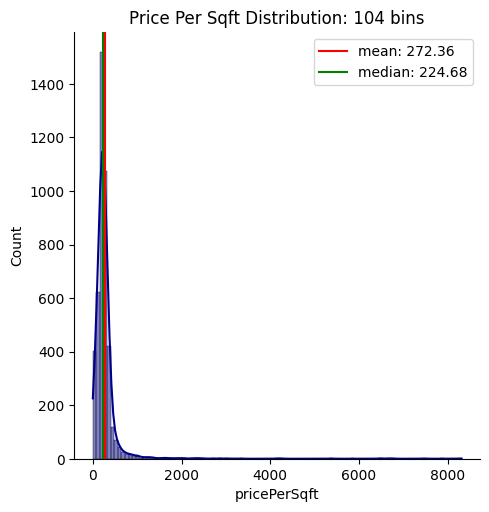

In [24]:
#calculate bins for 'ppsqft' variable/feature using Scotts Rule
mean = data_ppsqft.pricePerSqft.mean()
median = data_ppsqft.pricePerSqft.median()
bins = np.histogram_bin_edges(data_ppsqft['pricePerSqft'], bins='scott')
plt.figure(figsize=(5,15))

sns.displot(bins=bins, x=data_ppsqft['pricePerSqft'], color='darkblue', kde=True)
plt.axvline(mean, color='r', label=f'mean: {mean:.2f}')
plt.axvline(median, color='g', label=f'median: {median:.2f}')
plt.title(f"Price Per Sqft Distribution: {len(bins)} bins")
plt.legend(loc='best')
plt.show()

### Shapiro-Wilk Test is a test of normality. 

H0: Sample is from the normal distribution (p > a)

H1: Sample is not from a normal distribution (p < a)

This test will confirm whether or not the Price Per Sqft data is a normal distribution. This test informs us if ppsqft is centered around the mean, meaning the ppsqft is similar for all listed homes within the dataset. If it is not a normal distribution we will continue to analyze which factors affect this metric.

In [25]:
from scipy.stats import shapiro

alpha = 0.05
result, p = shapiro(data_ppsqft['pricePerSqft'])
print("W: ",result)
print("P-Value: ",p)
if(p < alpha):
    print("Price Per Sqft is not a normal distribution.\nWe will continue to explore what may have an effect on price per sqft")
else:
    print("Price Per Sqft is a normal distribution.")

W:  0.30437177419662476
P-Value:  0.0
Price Per Sqft is not a normal distribution.
We will continue to explore what may have an effect on price per sqft


## View boxplot of pricePerSqft for each house type
Different house types on average are marketed at different prices (e.g. townhomes tend to be more affordable than single-famlily homes). House type is used as a filter in these analyses to see if it factors into the PPSqft metric.

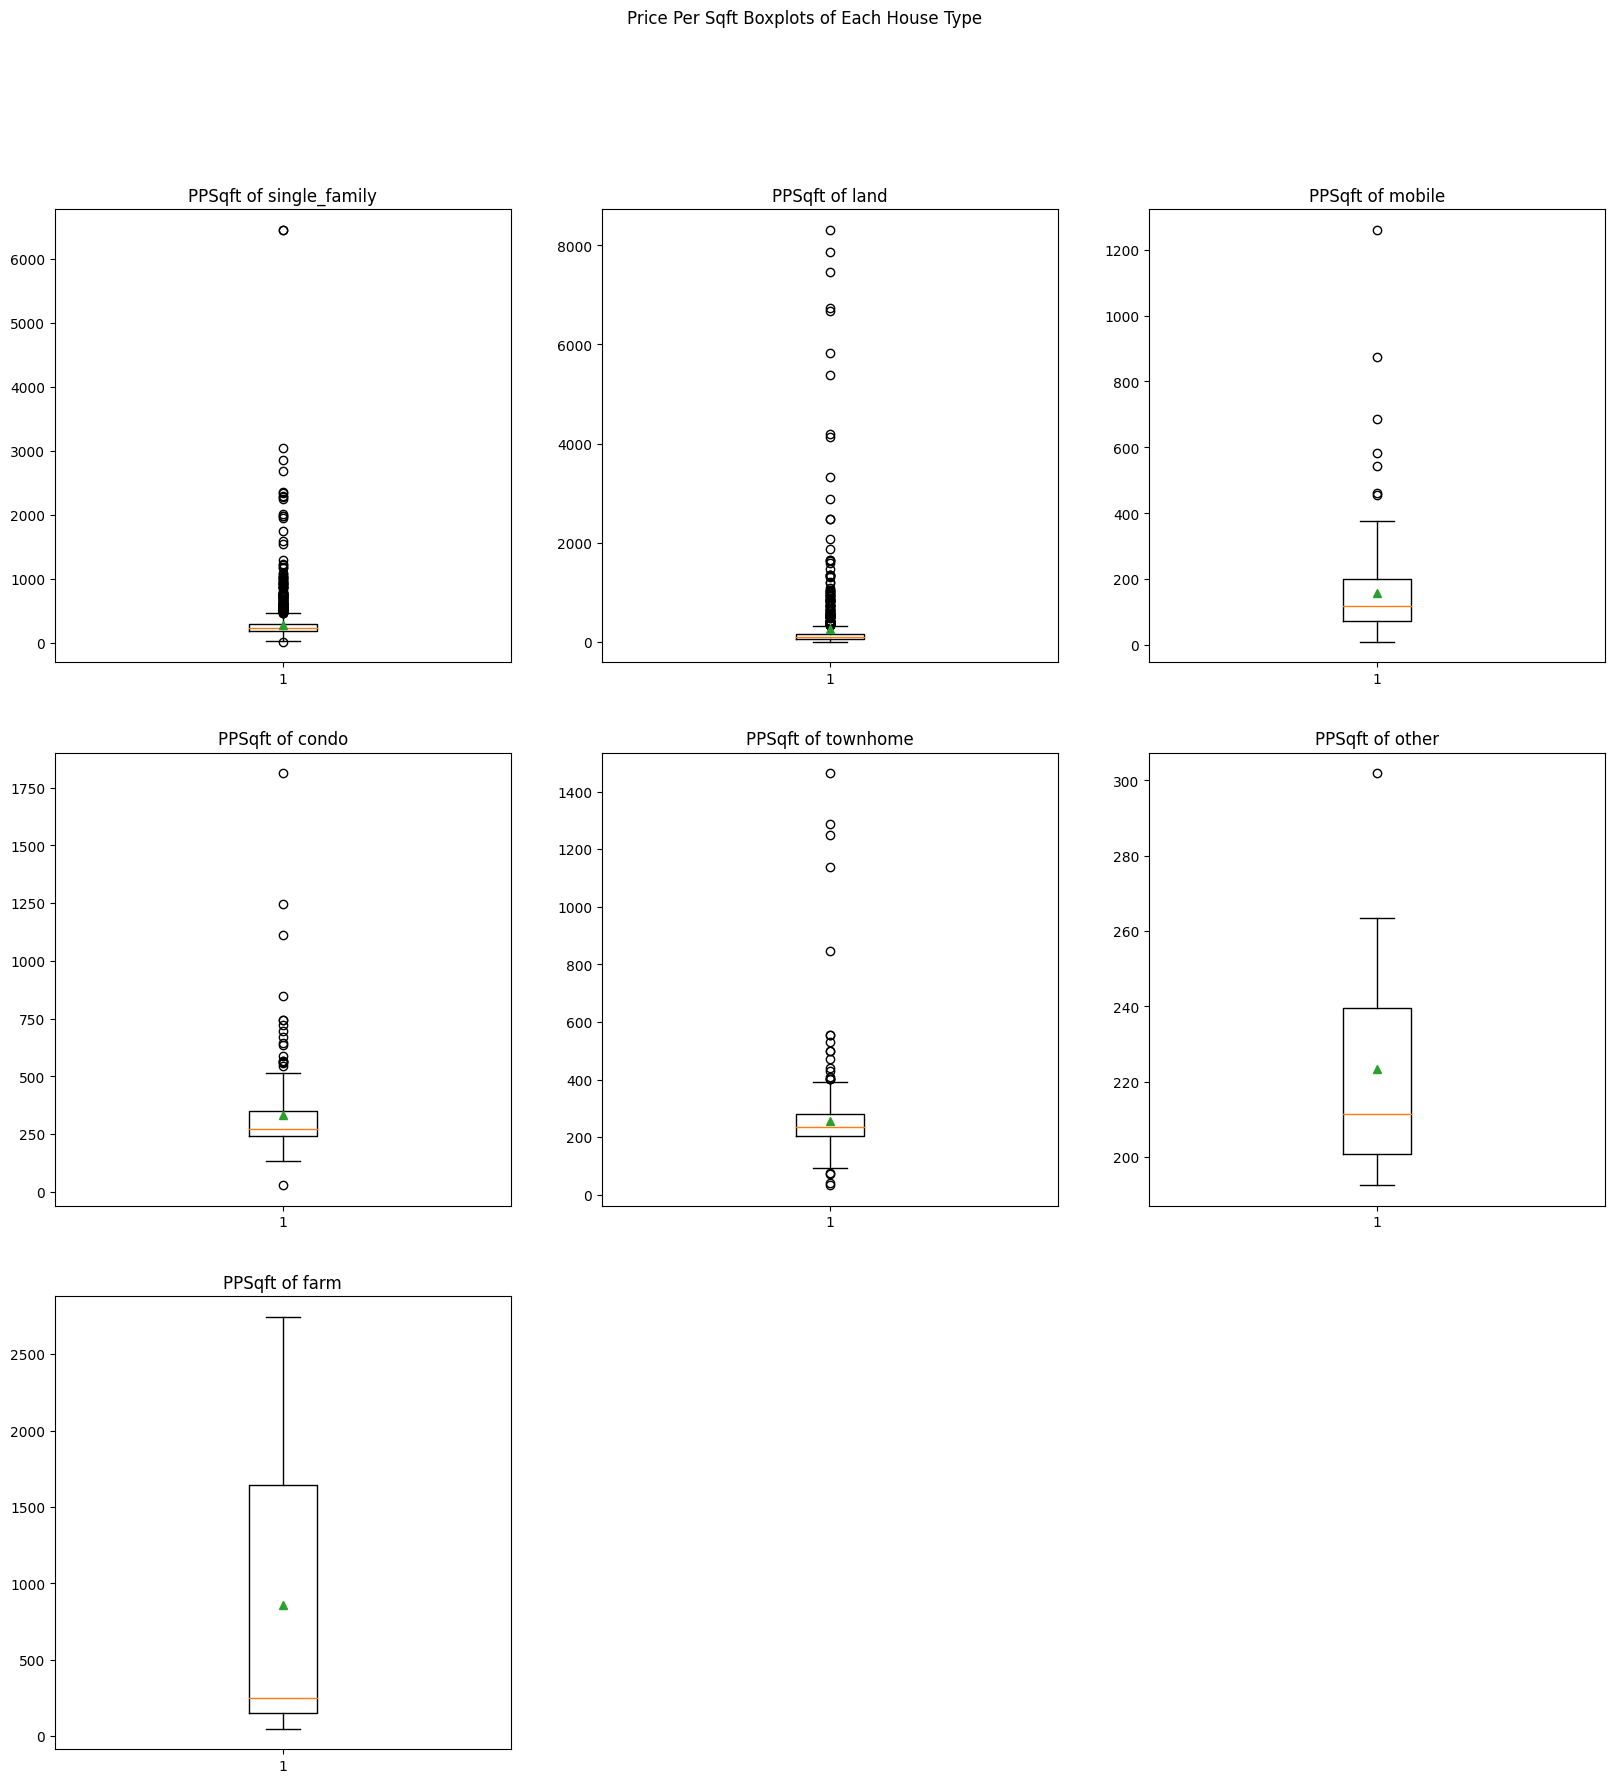

In [26]:
plt.figure(figsize=(20,20))

for i, houseType in enumerate(type_list, 1):
    plt.subplot(3,3,i)
    plt.boxplot(data_ppsqft["pricePerSqft"].loc[data_ppsqft['type'] == houseType], showmeans=True)
    plt.title(f"PPSqft of {houseType}")
plt.suptitle("Price Per Sqft Boxplots of Each House Type")
#plt.tight_layout()    
plt.show()

### Plot all house types in single grid for comparison

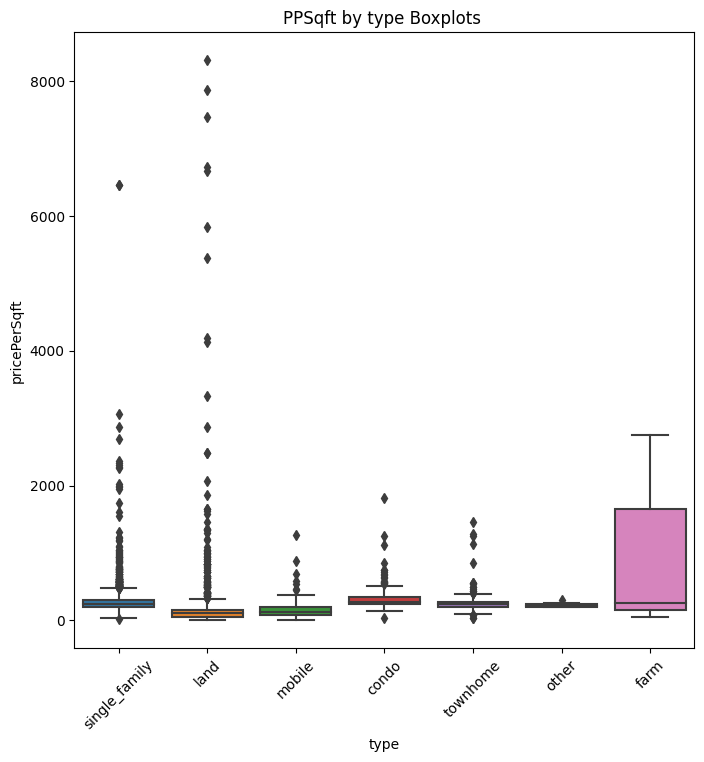

In [27]:
plt.figure(figsize=(8,8))
sns.boxplot(x="type", y="pricePerSqft", data=data_ppsqft)
plt.title("PPSqft by type Boxplots ")
plt.xticks(rotation=45)
plt.show()

## Descriptive stats of pricePerSqft per house Type

In [28]:
desc_df = pd.DataFrame()
for houseType in type_list:
    desc = data_ppsqft['pricePerSqft'].loc[data_ppsqft['type'] == houseType].describe()
    desc.name = houseType
    desc = pd.DataFrame(desc).T
    #print(desc)
    desc_df = pd.concat([desc_df, desc], ignore_index=False)

desc_df['type'] = desc_df.index
desc_df.index = range(desc_df.shape[0])
desc_df = desc_df[['type', 'count','mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print(desc_df)

            type   count   mean    std    min    25%    50%     75%     max
0  single_family 2864.00 282.30 249.03  24.99 196.13 241.22  307.99 6458.33
1           land  801.00 254.51 733.18   0.62  52.08 101.88  160.42 8312.50
2         mobile  206.00 159.32 138.43  10.42  74.22 118.37  200.75 1260.23
3          condo  171.00 332.63 193.46  29.09 240.27 272.96  352.26 1811.91
4       townhome  358.00 255.92 133.24  33.37 203.21 236.21  278.76 1463.19
5          other   12.00 223.35  33.82 192.50 200.90 211.30  239.48  301.87
6           farm    9.00 858.72 983.25  49.58 149.96 250.00 1645.83 2743.95


## Distribution of Price Per Sqft per house type

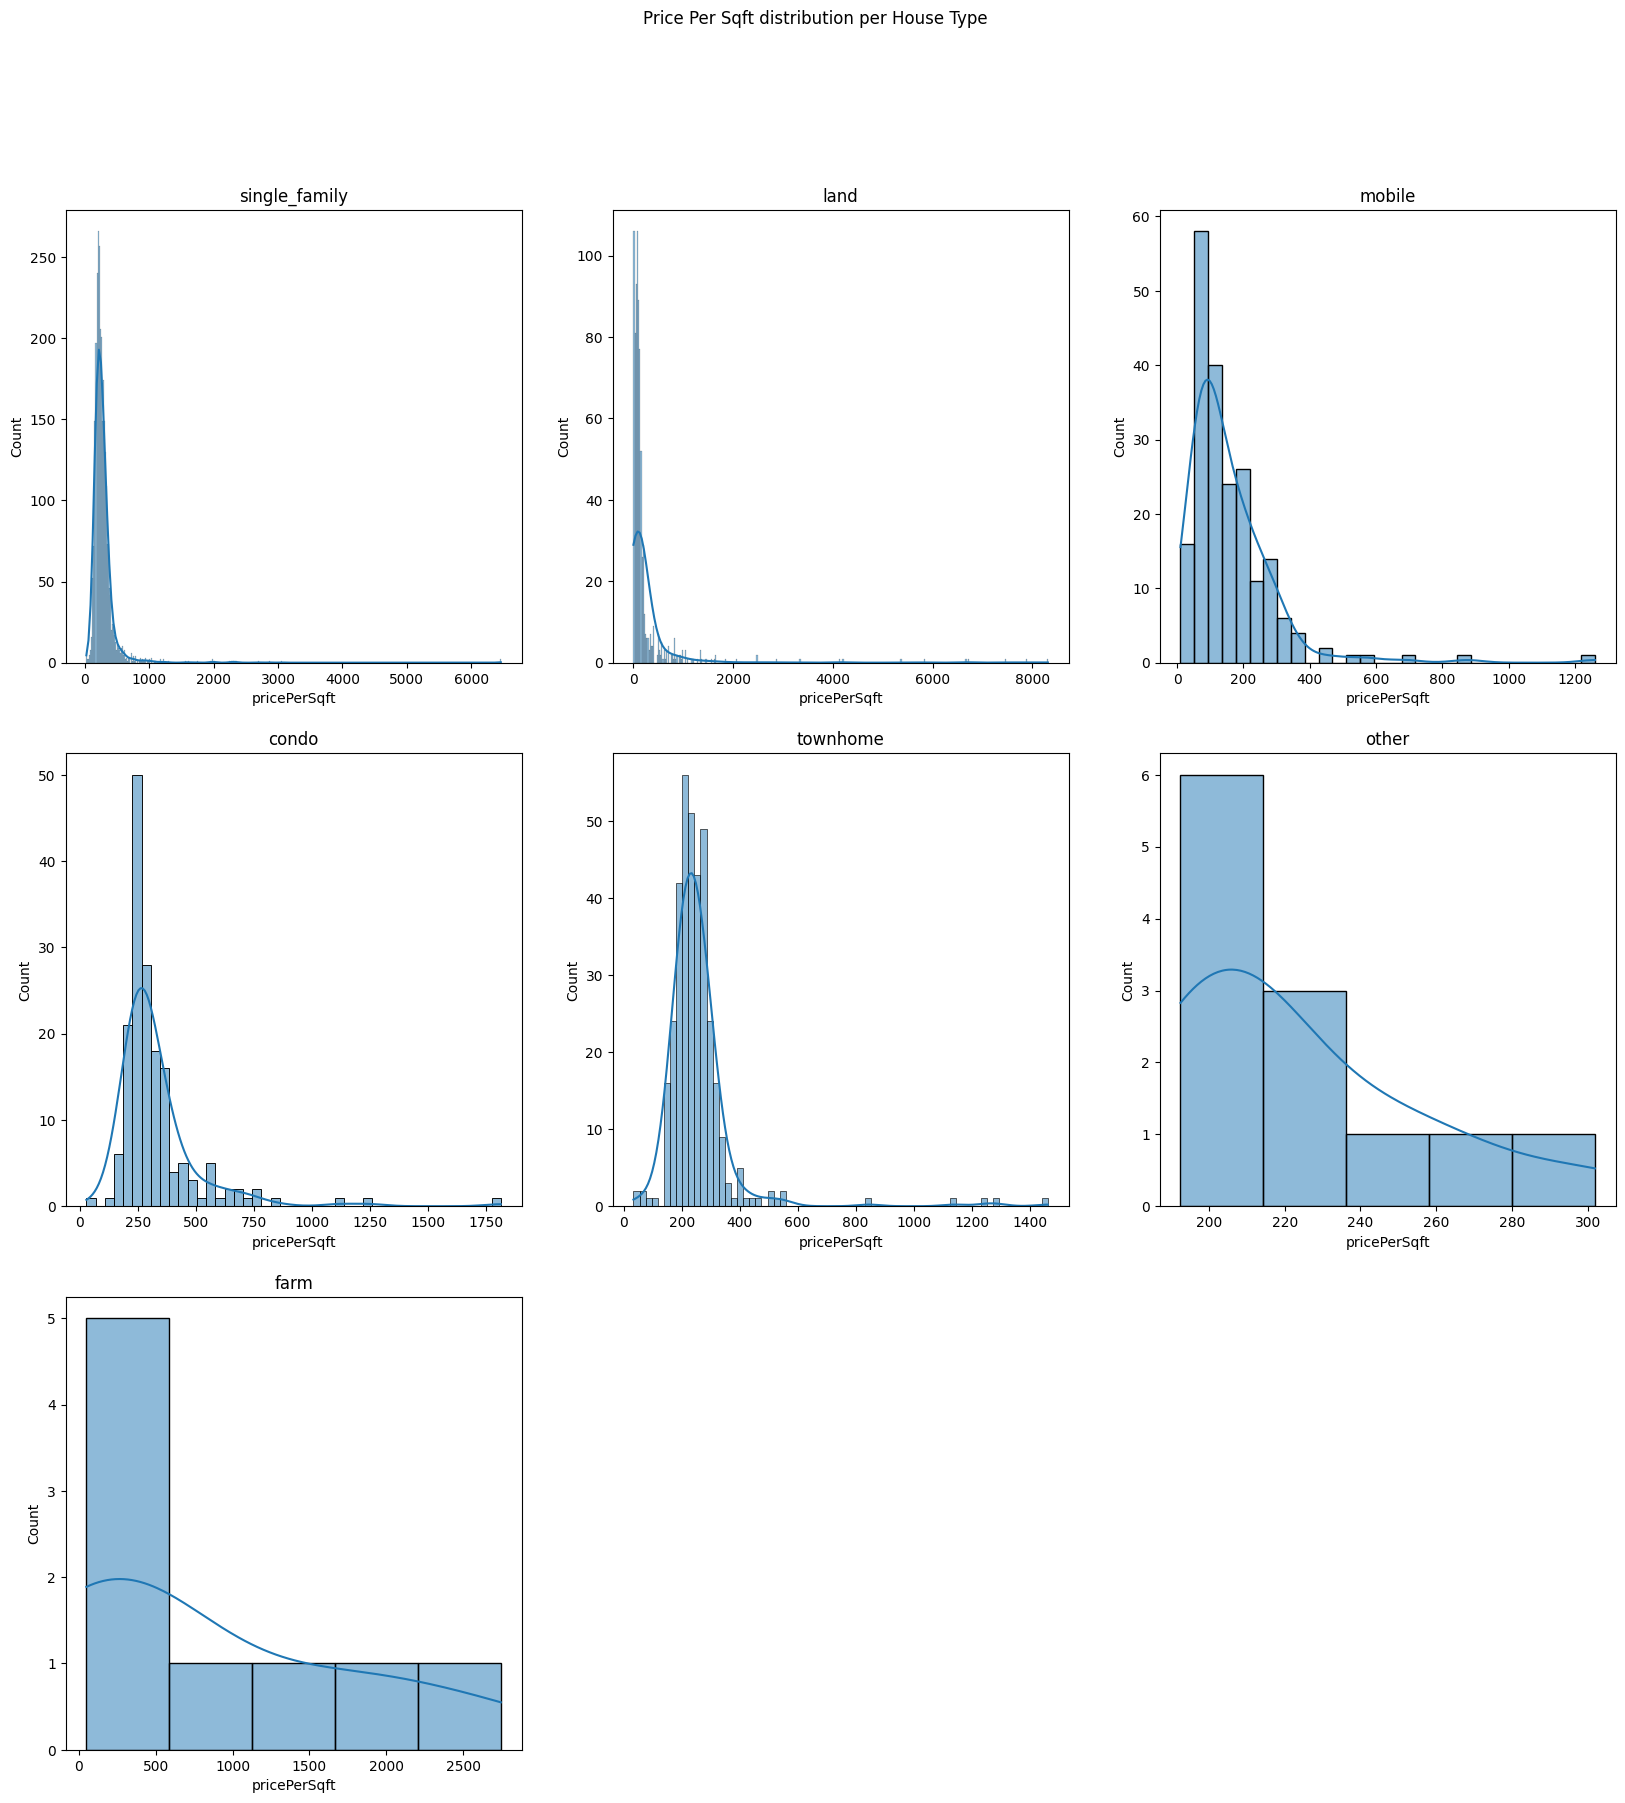

In [29]:
plt.figure(figsize=(20,20))

for i, houseType in enumerate(type_list, 1):
    plt.subplot(3,3,i) 
    sns.histplot(data_ppsqft["pricePerSqft"].loc[data_ppsqft['type'] == houseType], kde=True)
    plt.title(houseType)
plt.suptitle("Price Per Sqft distribution per House Type")    
plt.show()

In [30]:
alpha = 0.05

for houseType in type_list:
    print("House Type: " ,houseType)
    print("Skewness: ", data_ppsqft['pricePerSqft'].loc[data_ppsqft['type'] == houseType].skew())
    print("Mean: ",data_ppsqft['pricePerSqft'].loc[data_ppsqft['type'] == houseType].mean())
    print("Median: ",data_ppsqft['pricePerSqft'].loc[data_ppsqft['type'] == houseType].median())
    print("Standard Deviation: ",data_ppsqft['pricePerSqft'].loc[data_ppsqft['type'] == houseType].std())
    
    result, p = shapiro(data_ppsqft['pricePerSqft'].loc[data_ppsqft['type'] == houseType])
    print("W: ",result)
    print("P-Value: ",p)
    if(p < alpha):
        print("Price Per Sqft is not a normal distribution.\n")
    else:
        print("Price Per Sqft is a normal distribution.\n")

House Type:  single_family
Skewness:  13.72700763466026
Mean:  282.3002800121268
Median:  241.2213752174358
Standard Deviation:  249.0291842312236
W:  0.34130775928497314
P-Value:  0.0
Price Per Sqft is not a normal distribution.

House Type:  land
Skewness:  7.653097072801116
Mean:  254.51303058676655
Median:  101.875
Standard Deviation:  733.1844005075772
W:  0.27775460481643677
P-Value:  0.0
Price Per Sqft is not a normal distribution.

House Type:  mobile
Skewness:  3.7998513042956175
Mean:  159.3191862275339
Median:  118.37121212121212
Standard Deviation:  138.43446177888248
W:  0.6849346160888672
P-Value:  2.1042841473192538e-19
Price Per Sqft is not a normal distribution.

House Type:  condo
Skewness:  4.043862961040698
Mean:  332.63160051628023
Median:  272.96360485268633
Standard Deviation:  193.4618840451925
W:  0.6271494626998901
P-Value:  3.909373706656839e-19
Price Per Sqft is not a normal distribution.

House Type:  townhome
Skewness:  5.713055585803318
Mean:  255.9198897

### House type within group conclusion

This output shows price per Sqft is not similar amongst homes that are classified as the same type. Each house type group has a non-normal heavily skewed right distribution with a large standard deviation indicating much variabilty within groups.

## Kruskal-Wallis Test 
PPSqft data within the house type groups are not normally distributed meaning an ANOVA test can not be performed to analyze if each group is different. Kruskal-Wallis is used instead to test whether the median PPSqft for each house type is different or not.

H0: Samples all have the same central tendency and therefore there is no difference between groups (p > 0.05)

H1: At least one of the samples does not have the same central tendency and therefore there is a difference between groups (p < 0.05)

In [31]:
from scipy.stats import kruskal

singleFam_df = Find_Outliers(data_ppsqft, "pricePerSqft", 'single_family')[2]
land_df = Find_Outliers(data_ppsqft, "pricePerSqft", 'land')[2]
mobile_df = Find_Outliers(data_ppsqft, "pricePerSqft", 'mobile')[2]
condo_df = Find_Outliers(data_ppsqft, "pricePerSqft", 'condo')[2]
townhome_df = Find_Outliers(data_ppsqft, "pricePerSqft", 'townhome')[2]
other_df = Find_Outliers(data_ppsqft, "pricePerSqft", 'other')[2]
farm_df = Find_Outliers(data_ppsqft, "pricePerSqft", 'farm')[2]

result = kruskal(singleFam_df['pricePerSqft'], land_df['pricePerSqft'], mobile_df['pricePerSqft'],\
                condo_df['pricePerSqft'], townhome_df['pricePerSqft'], other_df['pricePerSqft'],\
                farm_df['pricePerSqft'])
print(result)

KruskalResult(statistic=1552.24788362764, pvalue=0.0)


### House type between groups conclusion
This result shows at least one of the samples do not have the same central tendency. This analysis indicates house types differ in terms of PPSqft, and within each house type group PPSqft differs as well.

## Compare home age to PPSqft (with PPSqft outliers)
'age' is being used as a preliminary feature to explore relationships between price per sqft and other features within the data set. It is known that as homes age the depreciation rate increases. This means the price per sqft should show a downward trend as home age increases because the ppsqft ratio should be less for older homes.

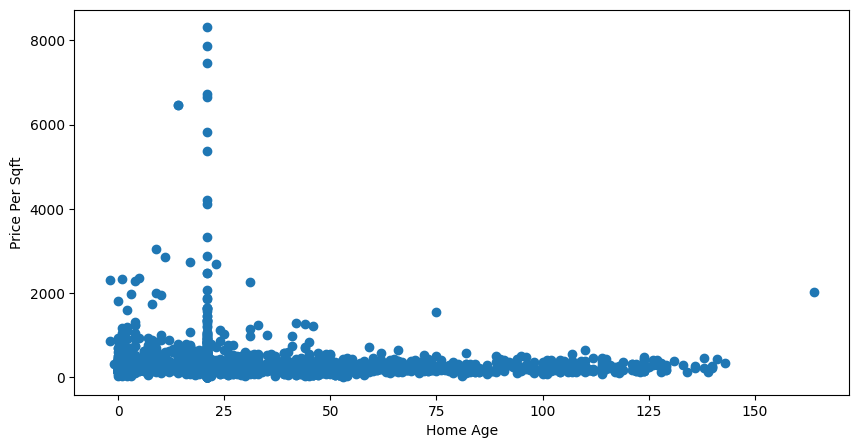

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(x=data_ppsqft['age'], y=data_ppsqft['pricePerSqft'])
plt.xlabel("Home Age")
plt.ylabel("Price Per Sqft")
plt.show()

This graph doesn't reveal a discernable relationship between ppsqft and home age

## Compare home age to PPSqft (PPSqft outliers removed)
'age' is being used as a preliminary feature to explore relationships between price per sqft and other features within the data set. It is known that as homes age the depreciation rate increases. This means the price per sqft should show a downward trend as home age increases because the ppsqft ratio should be less for older homes. Outliers are removed to lower noise in the data.

Data Skewness:  0.00047584806276346154


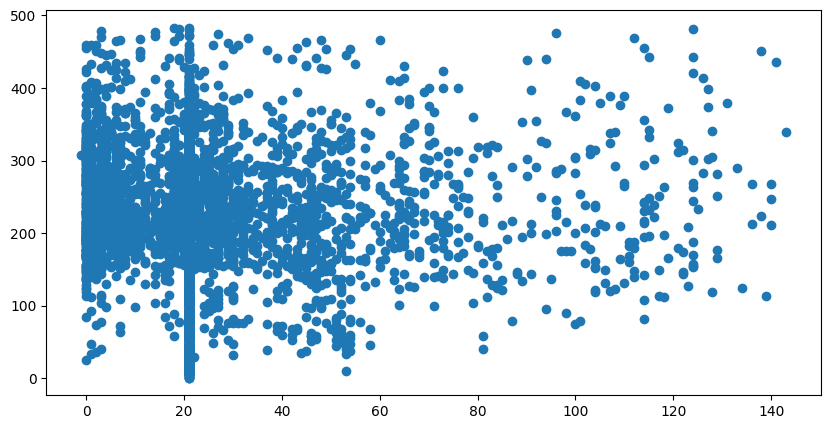

In [33]:
df_list = Find_Outliers(data_ppsqft, "pricePerSqft", "NULL") #[low, high, no_outliers]
#print(df_list[2].info())

print("Data Skewness: ",df_list[2]['pricePerSqft'].skew())

plt.figure(figsize=(10,5))
plt.scatter(x=df_list[2]["age"], y=df_list[2]["pricePerSqft"])
plt.show()

Additionally, with outliers removed there is no discernable relationship between ppsqft and home age 

## Compare home age to PPSqft based on house type 'single_family' (PPSqft outliers removed)
Different house types on average are marketed at different prices (e.g. townhomes tend to be more affordable than single-famlily homes). This section uses the single family home as a filter to see if a discernable relationship exists between home age and PPSqft removing noise from other house types within the data set. Single family home is used as it is the most represented house type in the data set.

Data Skewness:  0.5552148446021512


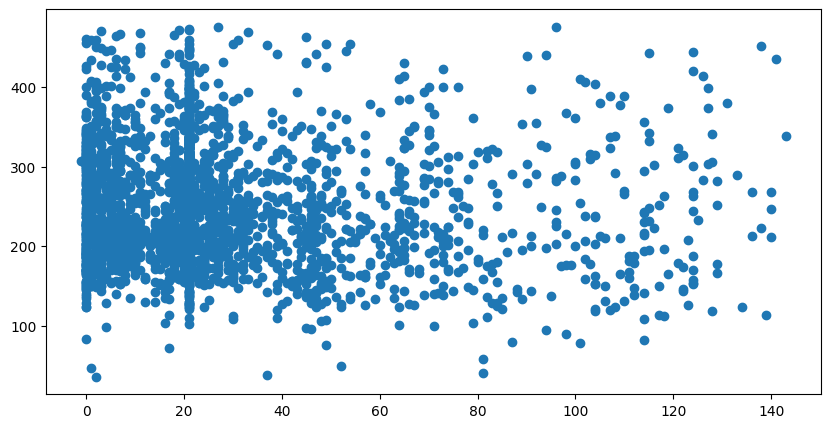

In [34]:
df_list = Find_Outliers(data_ppsqft, "pricePerSqft", "single_family")

print("Data Skewness: ",df_list[2]['pricePerSqft'].skew())

plt.figure(figsize=(10,5))
plt.scatter(x=df_list[2]["age"], y=df_list[2]["pricePerSqft"])
plt.show()

Using the most represented house type class in the data set, single family, and with outliers removed there is no discernable relationship between ppsqft and home age.

## Spearman Correlation Matrix
Home age doesn't appear to have a discernable relationship to PPSqft. In this section a pairwise correlation will be computed using the Spearman rank correlation with all features in the data set. Spearman is used here as the analysis with this data set does not pass all assumptions of the Pearson Correlation and Spearman is a nonparametric test for correlation. Spearman measures the strength and direction of association between two variables. This pairwise correlation will show us the measure of association PPSqft has with the other features in the data set. The Spearman coefficient ranges from +1 to -1. +1 indicates a perfect positive association. -1 indicates a perfect negative association. values closer to 0 indicate a weak association. 0 indicates no association.

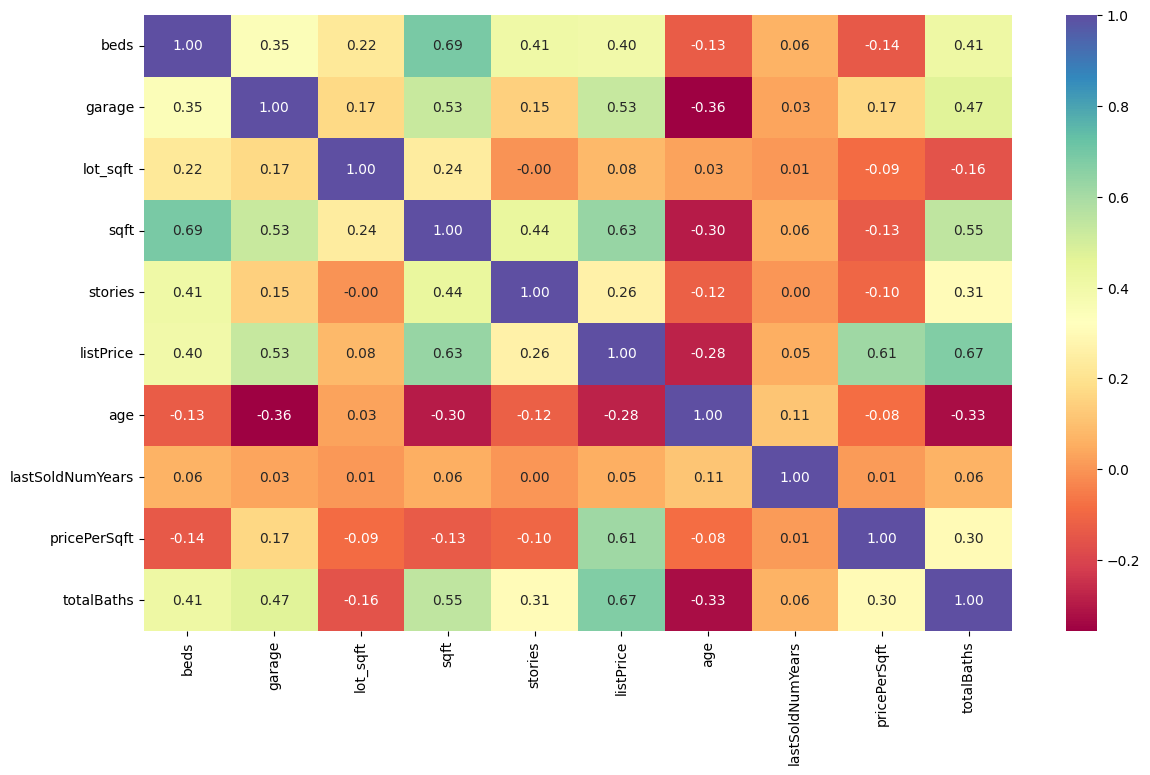

In [35]:
corr_matrix = data_ppsqft.corr(method='spearman')
plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.show()

This pairwise correlation doesn't indicate a strong association of PPSqft with the other features other than 'listPrice' which is a factor of the metric.

## Factor Analysis


### Remove outliers from the dependent variable 'pricePerSqft'

In [36]:
data_ppsqft_FA = Find_Outliers(data_ppsqft, "pricePerSqft", "NULL")[2]
print(data_ppsqft_FA.shape)

(4157, 12)


### Remove unneeded columns

In [37]:
data_ppsqft_FA.drop('status', axis=1, inplace=True)
print(data_ppsqft_FA.columns)

Index(['type', 'beds', 'garage', 'lot_sqft', 'sqft', 'stories', 'listPrice',
       'age', 'lastSoldNumYears', 'pricePerSqft', 'totalBaths'],
      dtype='object')


### Remove 'sqft' and 'listPrice' columns as they are factors of 'pricePerSqft'

In [38]:
data_ppsqft_FA.drop(columns=['sqft','listPrice'], axis=1, inplace=True)
print(data_ppsqft_FA.columns)

Index(['type', 'beds', 'garage', 'lot_sqft', 'stories', 'age',
       'lastSoldNumYears', 'pricePerSqft', 'totalBaths'],
      dtype='object')


### One-hot encode the 'type' and 'status' column 
This feature may be linearly related to other features in the data set.

In [39]:
data_ppsqft_FA = pd.get_dummies(data_ppsqft_FA, drop_first=True, dtype='int')
#data_ppsqft_FA.drop(columns=['type', 'status'],axis=1, inplace=True)
print(data_ppsqft_FA.columns)

Index(['beds', 'garage', 'lot_sqft', 'stories', 'age', 'lastSoldNumYears',
       'pricePerSqft', 'totalBaths', 'type_farm', 'type_land', 'type_mobile',
       'type_other', 'type_single_family', 'type_townhome'],
      dtype='object')


### Check homoscedasticity between variables
An assumption in factor analysis is there should not be homoscedasticity between variables. We will check this using 2 methods.

#### Plotting risiduals (y_pred - y) against the fitted values method

(4157, 13)
(4157,)


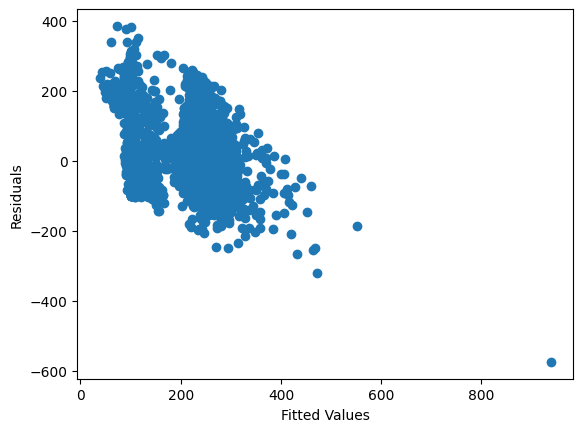

In [40]:
import statsmodels.api as sm

X = data_ppsqft_FA.drop(columns=['pricePerSqft'], axis=1)
y = data_ppsqft_FA['pricePerSqft']
print(X.shape)
print(y.shape)

model = sm.OLS(y, X).fit()
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

The data points aren't scattered around zero with a constant width. This appears to show heteroscedasticity between variables, the opposite of homoscedasitcity.

#### Breusch-Pagan Test
H0: Homoscedasticity is present (p > alpha)
H1: Homoscedasticity is not present. Heteroscedasticity exists (p < alpha)

In [41]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

alpha = 0.05
names = ['Lagrange Multipler Statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(residuals, X)

results = lzip(names,test)
for item in results:
    print(item)

if(results[1][1] < alpha):
    print("Null Hypothesis (H0) is rejected")
else:
    print("Failed to reject Null Hypothesis (H0)")

('Lagrange Multipler Statistic', 1432.5136502082676)
('p-value', 1.357731514182229e-299)
('f-value', 167.60637262073982)
('f p-value', 0.0)
Null Hypothesis (H0) is rejected


The Lagrange multiplier for the test is 1417.27 and the correspnding p-value is p<0.001 which is cause to reject the null hypothesis (H0) meaning homoscedasticity is not present. The assumption of no homoscedasticity between variables has been passed.

### Check Multicollinearity using Variance Inflation Factor method
An assumption in Factor Analysis is there should not be perfect multicolinearity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#create dataframe to hold VIFs
vif_data = pd.DataFrame()
vif_data['feature'] = data_ppsqft_FA.columns

#calculate VIF of each feature
vif_data["VIF"] = [variance_inflation_factor(data_ppsqft_FA, i) for i in range(len(data_ppsqft_FA.columns))]

print(vif_data)

               feature   VIF
0                 beds 20.02
1               garage  9.07
2             lot_sqft  1.07
3              stories 13.79
4                  age  2.48
5     lastSoldNumYears  4.32
6         pricePerSqft  7.68
7           totalBaths 10.68
8            type_farm  1.03
9            type_land  4.08
10         type_mobile  1.54
11          type_other  1.05
12  type_single_family 14.96
13       type_townhome  2.56


The 'pricePerSqft' feature is our variable being analyzed. With a VIF value that doesn't exceed 10 we will proceed with factor analysis considering the multicollinearity assumption passed

### Bartlett's test of sphericity
Checks whether or not the observered variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test is found statistically insignificant (p > alpha), factor analysis should not be employed. This is a method to check the factorability of the data set.

H0: Variables are orthogonal; not correlated (p > alpha)

H1: Variables are not orthogonal; diverges significantly from the identity matrix (p < alpha)

In [43]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

alpha = 0.05
chi_square, p_value = calculate_bartlett_sphericity(data_ppsqft_FA)

print(f"chi-square value: {chi_square}")
print(f"p-value: {p_value:.3f}")

if(p_value < alpha):
    print("Test has found statistical significance. Reject null hypothesis (H0)")
else:
    print("Test has found statistical insignificance. Fail to reject null hypothesis (H0)")

chi-square value: 16548.919024755894
p-value: 0.000
Test has found statistical significance. Reject null hypothesis (H0)


Data set is not an identity matrix, indicating there is some covariance in the data

### Kaiser Criterion
This is an analytical approach to determining the number of factors based on selecting factors that explain a more significant proportion of variance. The eigen value is a good criterion for determining this. For this an eigen value more than 1 will be selected.

In [55]:
from factor_analyzer import FactorAnalyzer

#perform factor analysis
fa = FactorAnalyzer()
fa.fit(data_ppsqft_FA)

#check Eigen values
ev, v = fa.get_eigenvalues()

print("Eigen Values: ")
print(ev)

Eigen Values: 
[2.82784008 1.81307471 1.37184411 1.17763566 1.05703772 1.01577918
 1.00287272 0.94178296 0.84173456 0.66147388 0.52945774 0.4035267
 0.29245833 0.06348164]


### Scree Plot
We also use a scree plot as a visual representation to determine the number of factors; this will be where the curve makes an elbow. We will pick the number of factors that are above 1.

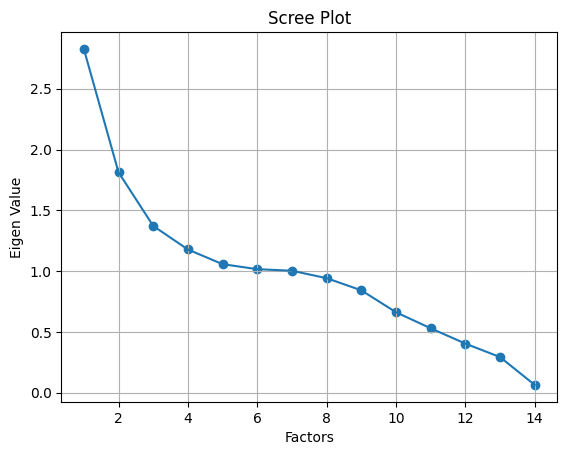

In [56]:
plt.scatter(range(1, data_ppsqft_FA.shape[1]+1), ev)
plt.plot(range(1, data_ppsqft_FA.shape[1]+1), ev)
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigen Value")
plt.grid()
plt.show()

In [57]:
num_factors = len([x for x in ev if x >= 1.0])
print("The number of factors chosen using the Kaiser Criterion: ", num_factors)

The number of factors chosen using the Kaiser Criterion:  7
